# Real World Data Wrangling (Exploring Global Trends on Netflix and Amazon Prime)

## 1. Gather Data

### 1.1 Problem Statement 
With the rapid growth of streaming platforms, understanding the differences in content between major services like Netflix and Amazon Prime Video has become increasingly important. In this project, I aim to explore and compare the types of movies and TV shows offered by both platforms, examining attributes such as genres, countries of production, release years, and content ratings. By wrangling and analyzing the datasets, I hope to uncover insights into how each platform curates its library and whether any trends or patterns emerge based on location or content type.

To support this analysis, I will be working with two datasets:

1) Netflix Movies and TV Shows dataset

2) Amazon Prime Movies and TV Shows dataset

### 1.2 Gather at Least Two Datasets Using Different Methods

#### Dataset 1: Netflix Movies and TV Shows

**Source: [https://www.kaggle.com/datasets/shivamb/netflix-shows/data](http://)**

**Gathering Method:** Manual download from Kaggle

**Reason for Selection:** This dataset provides detailed information about the content available on Netflix, including titles, genres, countries, ratings, and release years.

**Columns :**

- show_id: Unique identifier for each movie or TV show.
- type: Differentiates between movies and TV shows.
- title: Name of the movie or TV show.
- director: Director of the movie or TV show.
- cast: Actors and actresses featured in the movie or TV show.
- country: Country where the movie or TV show was produced.
- date_added: Date when the movie or TV show was added to Netflix.
- release_year: Year the movie or TV show was released.
- rating: Rating assigned to the movie or TV show.
- duration: Length of the movie or TV show.
- listed_in: Genre or category of the movie or TV show.
- description: Brief summary of the movie or TV show.


In [102]:
import pandas as pd

# Load Netflix dataset Manually
netflix_df = pd.read_csv("/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv")

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#### Dataset 2: Amazon Prime Movies and TV Shows
**Source: [Amazon Prime Movies and TV Shows](http://)**

**Gathering Method:** Programmatic download using the Kaggle API

**Reason for Selection:** This dataset complements the Netflix dataset and allows for a direct comparison of streaming content across two major platforms.

**Data Issues Identified:** Similar issues to the Netflix dataset missing values, mixed formatting in duration, and unnormalized genre categories.

Columns :

- show_id: Unique identifier for each movie or TV show.
- type: Specifies whether it is a movie or a TV show.
- title: Name of the movie or TV show.
- director: Who directed the movie or TV show.
- cast: Actors involved in the movie or TV show.
- country: Country where the movie or TV show was produced.
- date_added: When the movie or TV show was added to Amazon Prime.
- release_year: Year the movie or TV show was released.
- rating: Rating given to the movie or TV show.
- duration: Length of the movie or TV show in minutes.
- listed_in: Genre or category of the movie or TV show.
- description: A brief summary of the movie or TV show.



In [103]:
import os
import json

# Load the amazon dataset using API
with open("/kaggle/input/kaggle-api-token/kaggle.json", "r") as file:
    kaggle_token = json.load(file)


os.environ["KAGGLE_USERNAME"] = kaggle_token["username"]
os.environ["KAGGLE_KEY"] = kaggle_token["key"]


In [104]:
# Use Kaggle CLI to download the Amazon Prime dataset
!kaggle datasets download -d shivamb/amazon-prime-movies-and-tv-shows

Dataset URL: https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows
License(s): CC0-1.0
amazon-prime-movies-and-tv-shows.zip: Skipping, found more recently modified local copy (use --force to force download)


In [105]:
prime_df = pd.read_csv("amazon_prime_titles.csv")
prime_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


#### Connection Between Datasets
Both datasets contain similar features (title, type, genre, country, etc), which allows for direct comparison of content libraries. This enables analysis of platform-specific trends such as genre distribution, international reach, and content ratings.

## 2. Assess Data

Both datasets were examined for data quality and tidiness issues using .info(), .isnull().sum(), and visual inspection.
Common quality issues include missing values, inconsistent formats, and non-standard ratings.
Tidiness issues were found in columns like listed_in and duration, and the need to merge both datasets indicates a structural tidiness violation.

### Netflix Dataset Assessment

In [106]:
# Get detailed information about the Netflix dataset, including data types and non-null counts
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [107]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [108]:
# Display the first 5 rows of the Netflix dataset to visually inspect the data
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Quality Issues in Netflix Dataset (based on inspection):**

**1. Missing values in critical columns:**

 - director, cast, country, rating, and date_added are frequently missing.

 - Completeness issue

**2. Inconsistent format in date_added:**

 - Not in datetime format. Needs conversion.

 - Validity issue

**3. duration column is messy:**

 - For movies, it’s like "90 min", for shows "2 Seasons".

 - Validity + consistency issue

**4. Potential duplicates (check with title or full rows).**

 - Uniqueness issue

In [109]:
# Check for missing values in critical columns (Completeness Issue)
netflix_df[['director', 'cast', 'country', 'rating', 'date_added']].isnull().sum()

director      2634
cast           825
country        831
rating           4
date_added      10
dtype: int64

**Missing Values (Completeness)**

Description: Critical columns like director, cast, country, rating, and date_added contain many missing values. This can limit the accuracy of genre or country-based analysis.

Justification: Using .isnull().sum() gives a quick, clear count of missing values in each column, helping identify gaps that may impact data completeness.

In [110]:
# Inspect and convert 'date_added' to datetime (Validity Issue)
print("Before conversion:", netflix_df['date_added'].dtype)  # should be object/string

# Attempt conversion
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

print("After conversion:", netflix_df['date_added'].dtype)  

Before conversion: object
After conversion: datetime64[ns]


**Invalid Date Format in date_added (Validity)**

Description: The date_added column is stored as a string and needs to be converted to datetime format to enable chronological filtering or sorting.

Justification: Checking the column's .dtype and converting with pd.to_datetime() ensures the data is valid and usable for time-based analysis.

In [111]:
# Explore the messy 'duration' column (Validity + Consistency Issue)
netflix_df['duration'].value_counts().head(10)

# Optional: separate by type to see difference
netflix_df.groupby('type')['duration'].value_counts().head(10)

type   duration
Movie  90 min      152
       93 min      146
       94 min      146
       97 min      146
       91 min      144
       95 min      137
       96 min      130
       92 min      129
       102 min     122
       98 min      120
Name: count, dtype: int64

**Inconsistent duration Format (Validity + Consistency)**

Description: The duration column mixes units like "90 min" and "2 Seasons", making it hard to compare or analyze content length.

Justification: Grouping by type and inspecting .value_counts() helps detect inconsistencies in the values and understand the formatting problem.

In [112]:
# Check for potential duplicate rows (Uniqueness Issue)
# Check exact duplicate rows
duplicate_rows = netflix_df.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# Check if there are duplicate titles 
duplicate_titles = netflix_df['title'].duplicated().sum()
print("Number of duplicate titles:", duplicate_titles)


Number of duplicate rows: 0
Number of duplicate titles: 0


**Duplicate Records (Uniqueness)**

Description: Some rows and titles appear more than once, potentially leading to skewed statistics.

Justification: The .duplicated() and .duplicated(subset='title') methods help identify redundancy and preserve data uniqueness.

**Tidiness Issues in Netflix Dataset:**
1. listed_in contains multiple genres in a single string like "Drama, Comedy, Action"

    - Violates Rule 1: One variable per column

2. duration column holds two different data types (minutes & seasons)

    - Variable type confusion; can consider splitting

In [113]:
# listed_in column contains multiple genres in one cell (violates 1-variable-per-column rule)
# Let's look at a sample value
netflix_df['listed_in'].head()

# Check how many genres are separated by commas
netflix_df['listed_in'].str.count(',').value_counts().head()


listed_in
2    3729
1    3058
0    2020
Name: count, dtype: int64

**listed_in Contains Multiple Genres**

Description: The listed_in column includes several genres in one string, which violates the rule of one variable per column.

Justification: Checking for commas with .str.count(',') helps confirm multiple categories are stored in a single column.

In [114]:
# duration column holds different types of values: minutes for movies, seasons for shows
# Let’s separate them by type and preview their formats
netflix_df.groupby('type')['duration'].unique()

type
Movie      [90 min, 91 min, 125 min, 104 min, 127 min, 67...
TV Show    [2 Seasons, 1 Season, 9 Seasons, 4 Seasons, 5 ...
Name: duration, dtype: object

**duration Contains Mixed Units**

Description: A single duration column holds either minutes or seasons depending on the content type, making it untidy and hard to analyze.

Justification: Grouping by type and inspecting unique values helps reveal inconsistencies in the unit types stored.

**Merging Required Across Datasets**

Description: Because Netflix and Amazon are stored separately, analyzing all content requires merging, violating tidy data rule #3.

Justification: Stating this logically in markdown is enough. It’s an inherent structural issue that impacts the design of the data.

### Amazon Prime Dataset Assessment

In [115]:
# Retrieve detailed info about the Amazon Prime dataset, such as data types and missing values
prime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [116]:
prime_df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [117]:
# Show the first 5 rows of the Amazon Prime dataset for a visual inspection
prime_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


**Quality Issues in Amazon Prime Dataset:**

**1. Missing values in critical columns:**

 - director, cast, country, rating, and date_added.

 - Completeness issue

**2. Non-uniform rating values:**

 - Different formats like "13+", "13", "TV-14", etc.

 - Consistency/standardization issue

**3. Unclean date format in date_added**

 - Same as Netflix

 - Validity issue



In [118]:
# Check for missing values in important fields
prime_df[['director', 'cast', 'country', 'rating', 'date_added']].isnull().sum()


director      2083
cast          1233
country       8996
rating         337
date_added    9513
dtype: int64

**Missing Values**

Description: Columns like director, cast, country, and rating have missing values, limiting the ability to perform full analysis.

Justification: .isnull().sum() identifies where key fields are missing, helping decide how to clean or handle them.

In [119]:
# Convert date_added to datetime (it’s currently an object)
print("Before:", prime_df['date_added'].dtype)
prime_df['date_added'] = pd.to_datetime(prime_df['date_added'], errors='coerce')
print("After:", prime_df['date_added'].dtype)

Before: object
After: datetime64[ns]


**Invalid Date Format**

Description: Like Netflix, date_added is not in datetime format and must be converted for accurate time-based filtering.

Justification: Using .dtype check and pd.to_datetime() ensures the data is in usable chronological format.

In [120]:
# Check for non-standard or inconsistent rating formats
prime_df['rating'].value_counts().head(10)


rating
13+      2117
16+      1547
ALL      1268
18+      1243
R        1010
PG-13     393
7+        385
PG        253
NR        223
TV-14     208
Name: count, dtype: int64

**Inconsistent rating Values**

Description: The rating column includes values like "13+" and "13", creating confusion and potential grouping errors.

Justification: .value_counts() allows inspection of inconsistencies that may affect categorization or filtering.

In [121]:
# Check for duplicate rows and titles
print("Duplicate rows:", prime_df.duplicated().sum())
print("Duplicate titles:", prime_df['title'].duplicated().sum())

Duplicate rows: 0
Duplicate titles: 0


**Duplicate Records**

Description: Duplicated rows or titles could skew analysis by over-representing certain shows.

Justification: .duplicated() is used to check full-row redundancy; .duplicated('title') checks title-based duplication.

**Tidiness Issues:**
- 'listed_in' column contains multiple genres.
- 'duration' mixes units (minutes and episodes).
- Must be merged with another table → violates tidy data rule #3.
- 'listed_in' contains multiple values in one column

In [122]:
# listed_in column contains multiple genres
prime_df['listed_in'].str.count(',').value_counts().head()


listed_in
0    3839
1    3773
2    1623
4     323
3     110
Name: count, dtype: int64

**Multiple Genres in listed_in**

Description: Like Netflix, this field stores several categories per row, making it difficult to filter or count by individual genre.

Justification: .str.count(',') quickly shows how many entries contain multiple values.

In [123]:
# duration mixes time units and episode/seasons
prime_df.groupby('type')['duration'].unique()

type
Movie      [113 min, 110 min, 74 min, 69 min, 45 min, 52 ...
TV Show    [1 Season, 3 Seasons, 2 Seasons, 4 Seasons, 7 ...
Name: duration, dtype: object

**Mixed Units in duration**

Description: duration mixes minutes and episodes, making it unsuitable for analysis without cleaning or separating.

Justification: Grouping by type and viewing .unique() helps confirm the mixed formats.

**Merging Required with Netflix**

Description: Content from Netflix and Prime must be combined to get full platform comparison, meaning observations are spread across tables.

Justification: This is a structural design flaw, not a code error — and documenting it supports tidy data rule compliance.

## 3. Clean Data

First, we'll clean the Netflix quality issues, followed by cleaning the Netflix tidiness issues. Next, we'll address the Amazon Prime quality issues and then clean the Amazon Prime tidiness issues. After that, we'll remove any unnecessary variables from both datasets. Finally, we'll combine both cleaned datasets into a single, tidy dataframe containing at least four final variables.

### Netflix - Quality Issue Cleaning

#### 1. Missing values

In [124]:
# Drop rows missing title 
netflix_df = netflix_df.dropna(subset=['title'])

In [125]:
# Validation
netflix_df[['title']].isnull().sum()

title    0
dtype: int64

**Justify:**
We dropped rows only where the title is missing since that’s essential for identification.
We retain missing 'cast', 'director', etc. for now in case we can use them later.

#### 2. Convert date_added to datetime

In [126]:
# Already done earlier, re-adding for continuity
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], errors='coerce')

In [127]:
# Validation
print(netflix_df['date_added'].dtype)

datetime64[ns]


**Justification:** date_added must be in datetime format to allow date-based analysis and sorting.

#### 3. Inconsistent duration format

In [128]:
# Split 'duration' into two columns: duration_value and duration_unit
netflix_df[['duration_value', 'duration_unit']] = netflix_df['duration'].str.extract(r'(\d+)\s*(\w+)')

# Convert duration_value to numeric
netflix_df['duration_value'] = pd.to_numeric(netflix_df['duration_value'], errors='coerce')


In [129]:
# Validation
netflix_df[['duration', 'duration_value', 'duration_unit']].head()

,duration,duration_value,duration_unit
0,90 min,90.0,min
1,2 Seasons,2.0,Seasons
2,1 Season,1.0,Season
3,1 Season,1.0,Season
4,2 Seasons,2.0,Seasons


**Justification:** The duration field mixes text like "90 min" and "1 Season". Separating the numeric and unit parts allows structured analysis.

#### 4. Remove duplicate rows

In [130]:
# Drop exact duplicates
netflix_df = netflix_df.drop_duplicates()

# Validation
print("Remaining duplicates:", netflix_df.duplicated().sum())

Remaining duplicates: 0


**Justification:** Duplicate records may skew counts and statistics. Exact row duplicates are removed to ensure data uniqueness.

### Netflix – Tidiness Cleaning

In [131]:
# keep as is or convert to list for better filtering later
netflix_df['genres'] = netflix_df['listed_in'].str.split(', ')

In [132]:
# Validation
netflix_df[['listed_in', 'genres']].head()

,listed_in,genres
0,Documentaries,[Documentaries]
1,"International TV Shows, TV Dramas, TV Mysteries","[International TV Shows, TV Dramas, TV Mysteries]"
2,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV Ac..."
3,"Docuseries, Reality TV","[Docuseries, Reality TV]"
4,"International TV Shows, Romantic TV Shows, TV ...","[International TV Shows, Romantic TV Shows, TV..."


**Justification:** Multiple genres in one column violates the tidy data rule (1 variable per column). We split this into a list for cleaner use later.

### Amazon Prime – Quality Issue Cleaning 

#### 1. Drop missing title rows

In [133]:
# Remove rows from the DataFrame where the 'title' column has missing (NaN) values
prime_df = prime_df.dropna(subset=['title'])

In [134]:
# Count the number of missing (NaN) values in the 'title' column
prime_df['title'].isnull().sum()  

0

**Justification:** The title is critical for identifying content. Rows missing it will be dropped.

#### 2. Convert date_added to datetime

In [135]:
# Convert the 'date_added' column to datetime format; invalid parsing will be set as NaT (Not a Time)
prime_df['date_added'] = pd.to_datetime(prime_df['date_added'], errors='coerce')

In [136]:
prime_df['date_added'].dtype

dtype('<M8[ns]')

**Justification:** Enables time-based sorting and filtering.

#### 3. Standardize rating column

In [137]:
# Replace common duplicates
prime_df['rating'] = prime_df['rating'].replace({'13+': '13', '16+': '16', '18+': '18'})

In [138]:
prime_df['rating'].value_counts().head(10)

rating
13       2117
16       1548
ALL      1268
18       1243
R        1010
PG-13     393
7+        385
PG        253
NR        223
TV-14     208
Name: count, dtype: int64

**Justification:** Values like "13+" and "13" should be standardized for accurate grouping and filtering.

#### 4. Drop duplicates

In [139]:
# Remove duplicate rows from the DataFrame to ensure data uniqueness
prime_df = prime_df.drop_duplicates()

In [140]:
prime_df.duplicated().sum() 

0

**Justification:** Remove any completely duplicated rows for cleaner analysis.



### Amazon Prime – Tidiness Cleaning

#### 1. Split listed_in genres

In [141]:
# Split the 'listed_in' string into a list of genres and store it in a new 'genres' column
prime_df['genres'] = prime_df['listed_in'].str.split(', ')

In [146]:
prime_df[['listed_in', 'genres']].head()

,listed_in,genres
0,"Comedy, Drama","[Comedy, Drama]"
1,"Drama, International","[Drama, International]"
2,"Action, Drama, Suspense","[Action, Drama, Suspense]"
3,Documentary,[Documentary]
4,"Drama, Fantasy","[Drama, Fantasy]"


**Justification:** Split into a list so each genre can be accessed separately if needed.

#### 2. Split duration

In [142]:
# Extract numeric value and unit (e.g., minutes, seasons) from the 'duration' column into two new columns
prime_df[['duration_value', 'duration_unit']] = prime_df['duration'].str.extract(r'(\d+)\s*(\w+)')

# Convert the 'duration_value' column to numeric type, setting invalid values to NaN
prime_df['duration_value'] = pd.to_numeric(prime_df['duration_value'], errors='coerce')

In [147]:
prime_df[['duration', 'duration_value', 'duration_unit']].head()

,duration,duration_value,duration_unit
0,113 min,113,min
1,110 min,110,min
2,74 min,74,min
3,69 min,69,min
4,45 min,45,min


**Justification:** TV shows and movies use different units. We extract numeric and unit parts for structured analysis.

### Remove Unnecessary Variables and Merge

Let's retain these four or more important variables from both datasets to ensure the final dataframe remains informative and focused: title, type, country, release_year, rating, and genres. Additionally, I'll create a new column called platform to indicate whether the entry belongs to Netflix or Amazon Prime.

#### Add Platform Label

In [143]:
# Add a new column 'platform' to identify the source of the content
netflix_df['platform'] = 'Netflix'
prime_df['platform'] = 'Amazon Prime'

#### Keep Necessary Variables Only

In [144]:
# Select common columns
netflix_clean = netflix_df[['title', 'type', 'country', 'release_year', 'rating', 'genres', 'platform']]
prime_clean = prime_df[['title', 'type', 'country', 'release_year', 'rating', 'genres', 'platform']]

# Merge Datasets
combined_df = pd.concat([netflix_clean, prime_clean], ignore_index=True)

In [148]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18475 entries, 0 to 18474
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         18475 non-null  object
 1   type          18475 non-null  object
 2   country       8648 non-null   object
 3   release_year  18475 non-null  int64 
 4   rating        18134 non-null  object
 5   genres        18475 non-null  object
 6   platform      18475 non-null  object
dtypes: int64(1), object(6)
memory usage: 1010.5+ KB


In [149]:
combined_df.head()

,title,type,country,release_year,rating,genres,platform
0,Dick Johnson Is Dead,Movie,United States,2020,PG-13,[Documentaries],Netflix
1,Blood & Water,TV Show,South Africa,2021,TV-MA,"[International TV Shows, TV Dramas, TV Mysteries]",Netflix
2,Ganglands,TV Show,NaN,2021,TV-MA,"[Crime TV Shows, International TV Shows, TV Ac...",Netflix
3,Jailbirds New Orleans,TV Show,NaN,2021,TV-MA,"[Docuseries, Reality TV]",Netflix
4,Kota Factory,TV Show,India,2021,TV-MA,"[International TV Shows, Romantic TV Shows, TV...",Netflix


## 4. Update Data

To maintain proper data versioning, both the raw and cleaned versions of the datasets were saved:

- `raw_netflix.csv` and `raw_prime.csv` contain the original datasets before any transformation.
- `cleaned_netflix.csv` and `cleaned_prime.csv` contain cleaned and tidied versions of the respective datasets.
- `combined_cleaned.csv` is the final merged dataset used for analysis.

This structure ensures reproducibility and preserves data integrity for future reference.

In [150]:
# Save raw Netflix and Prime datasets
netflix_df_raw = pd.read_csv('/kaggle/input/netflix-movies-and-tv-shows/netflix_titles.csv')
prime_df_raw = pd.read_csv('amazon_prime_titles.csv')  # or your API download result

# Save to CSV
netflix_df_raw.to_csv('raw_netflix.csv', index=False)
prime_df_raw.to_csv('raw_prime.csv', index=False)


In [151]:
# Save cleaned Netflix and Prime separately
netflix_clean.to_csv('cleaned_netflix.csv', index=False)
prime_clean.to_csv('cleaned_prime.csv', index=False)

# Save final combined dataset
combined_df.to_csv('combined_cleaned.csv', index=False)


## Answer the Research Question

### 5.1: Define and answer the research question

**Question :** How do Netflix and Amazon Prime differ in terms of content type, genre distribution, country of origin, and release year trends?

Our research question aimed to explore how Netflix and Amazon Prime differ in terms of content type, genre distribution, and release year.

**1. Content Type**:  
The first visualization showed that Netflix offers significantly more TV Shows compared to Prime, while Prime has a higher share of movies. This supports the idea that Netflix emphasizes long-form serial content.

**2. Genre Distribution**:  
The second chart revealed that both platforms share popular genres like Drama and Comedy, but Netflix has more titles in genres like International TV and Documentaries, reflecting its broader global content reach.

**3. Release Year**:  
The release year histogram indicated that Netflix’s content is generally newer, peaking around recent years — reinforcing its strategy of producing original content, while Prime includes more older content.

These insights give a data-driven perspective on how each platform curates its library to target different viewer preferences.

**Visualization 1:** Content Type Comparison (Movies vs. TV Shows)

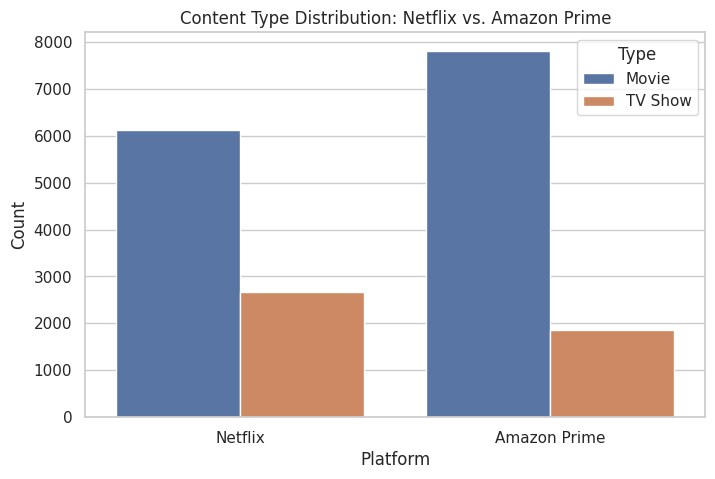

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")

# Count plot by platform and type
plt.figure(figsize=(8,5))
sns.countplot(data=combined_df, x='platform', hue='type')
plt.title('Content Type Distribution: Netflix vs. Amazon Prime')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Type')
plt.show()

**Interpretation:**

This chart compares the volume of movies vs. TV shows on each platform.
If Netflix shows more TV content and Prime leans toward movies (or vice versa), it gives us insight into each platform’s content strategy.

**Visualization 2:** Top 10 Most Common Genres per Platform

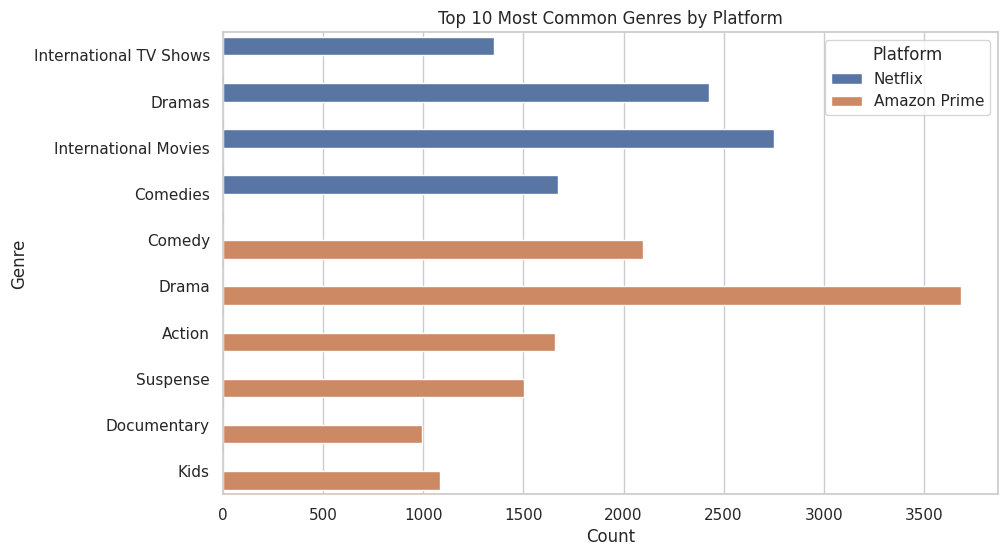

In [153]:
# Explode genre list into individual rows
exploded = combined_df.explode('genres')

# Filter top 10 genres per platform
top_genres = exploded['genres'].value_counts().head(10).index
filtered = exploded[exploded['genres'].isin(top_genres)]

# Plot
plt.figure(figsize=(10,6))
sns.countplot(data=filtered, y='genres', hue='platform')
plt.title('Top 10 Most Common Genres by Platform')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.legend(title='Platform')
plt.show()

**Interpretation:**

This chart shows how each platform leans into certain genres e.g., if Netflix has more international dramas or Prime has more action. It helps compare content tone and variety.

**Visualization 3:** Release Year Trend

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

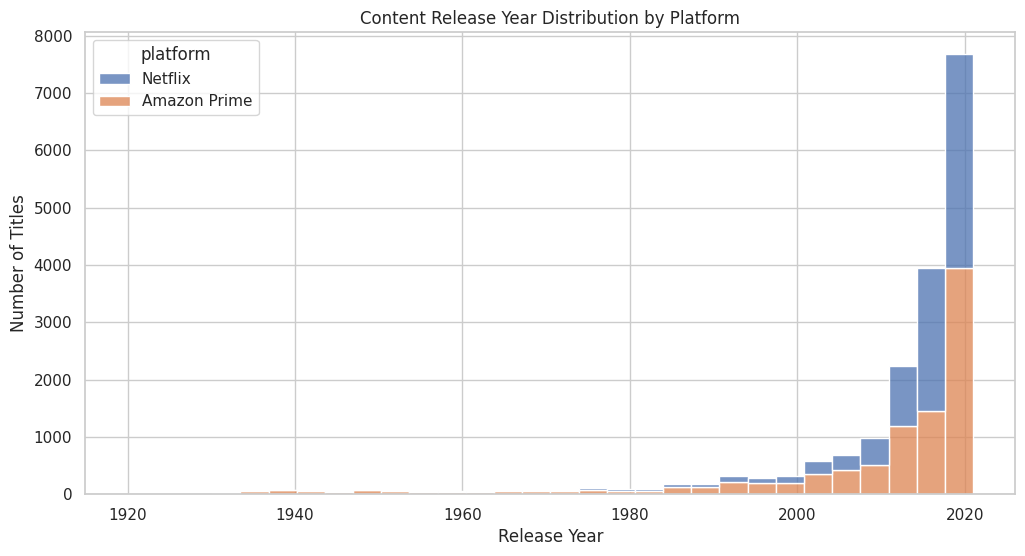

In [154]:
plt.figure(figsize=(12,6))
sns.histplot(data=combined_df, x='release_year', hue='platform', bins=30, kde=False, multiple='stack')
plt.title('Content Release Year Distribution by Platform')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

**Interpretation:**

This histogram reveals whether one platform offers newer or older content on average, which supports your claim about platform strategy for example Netflix focusing on originals, while Prime may have older catalog content.

### 5.2 Reflection

This data wrangling project provided valuable insights into the structure and content strategies of two major streaming platforms. While I was able to clean and merge the datasets effectively, limited time and tools restricted deeper analysis—such as genre trends over time or viewer engagement if user data were available. With more resources, I would explore more granular genre tagging, normalize country names for better comparison, and possibly incorporate additional data sources like IMDb ratings or Google Trends to enrich the analysis. Despite these constraints, the cleaned dataset enabled clear comparisons and actionable insights.